In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('housing/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2006,-119.80,36.75,41.0,1659.0,466.0,1391.0,447.0,1.3527,61200.0,INLAND
2370,-119.57,36.70,34.0,1759.0,354.0,899.0,337.0,2.6823,72900.0,INLAND
17593,-121.91,37.30,31.0,2095.0,427.0,829.0,405.0,3.6563,344700.0,<1H OCEAN
11499,-118.05,33.72,14.0,2673.0,687.0,1192.0,656.0,4.1862,188900.0,<1H OCEAN
17845,-121.87,37.42,19.0,12128.0,2112.0,6810.0,2040.0,6.4419,264500.0,<1H OCEAN


In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
# find the number of skewed data/ outliers(which was observed during EDA)
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [6]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# categorical data 
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
# Convert categorical values to numeric values using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [12]:
housing_data.shape

(19475, 14)

In [13]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17966,-121.98,37.31,32.0,2248.0,460.0,1191.0,419.0,5.6060,288900.0,1,0,0,0,0
1960,-120.67,38.76,35.0,2104.0,403.0,1060.0,400.0,2.1682,138100.0,0,1,0,0,0
6597,-118.16,34.18,44.0,1870.0,389.0,1345.0,391.0,1.8932,136100.0,1,0,0,0,0
20587,-121.60,39.15,19.0,1396.0,336.0,940.0,309.0,1.5208,70300.0,0,1,0,0,0
11596,-118.08,33.79,34.0,2840.0,395.0,1127.0,396.0,7.6144,376200.0,1,0,0,0,0


In [14]:
# Set up features and targets
X = housing_data.drop('median_house_value',axis=1)
Y = housing_data['median_house_value']

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
# split into train set and test set  80% used for training, 20% used for test
# will shuffle
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [17]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [18]:
y_train.shape, y_test.shape

((15580,), (3895,))

Preprocessing

Normalization scales all numeric features to be between 0 and 1. Having features in the same scale can vastly improve the performance of your ML model.

In [19]:
from sklearn.linear_model import LinearRegression

# instantiate linear regression object
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

Print train_score in R-squared

R-square is a measure of how well our linear model captures the underlying variation in our training data

In [20]:
print('Training_score: ', linear_model.score(x_train,y_train))

Training_score:  0.6114060546723004


In [21]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Y = mX + c

Think the coefficient as how much particular feature contributed towards the prediction

Coefficients in sorted order
-> negative values indicate these are the features that tend to lower the price of a house

In [23]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

longitude                     -25082.881674
ocean_proximity_INLAND        -24668.307798
latitude                      -23353.317040
population                       -29.301415
total_rooms                       -7.142780
households                        36.917665
total_bedrooms                    94.148511
housing_median_age               925.172040
ocean_proximity_NEAR BAY        7092.261252
ocean_proximity_<1H OCEAN      12215.815665
ocean_proximity_NEAR OCEAN     16464.760493
median_income                  38642.219491
ocean_proximity_ISLAND        152422.298353
dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
17210,181362.618350,255000.0
1180,61978.707859,53900.0
20167,195723.177440,234700.0
160,178238.800022,211500.0
13281,149697.709730,137300.0
13558,79002.204022,59700.0
7926,245051.395287,213100.0
10771,261733.649893,245500.0
8035,260037.665936,336000.0
10918,171999.061563,159100.0


In [26]:
# Double check predictions (R-squared score)
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6188477770585799


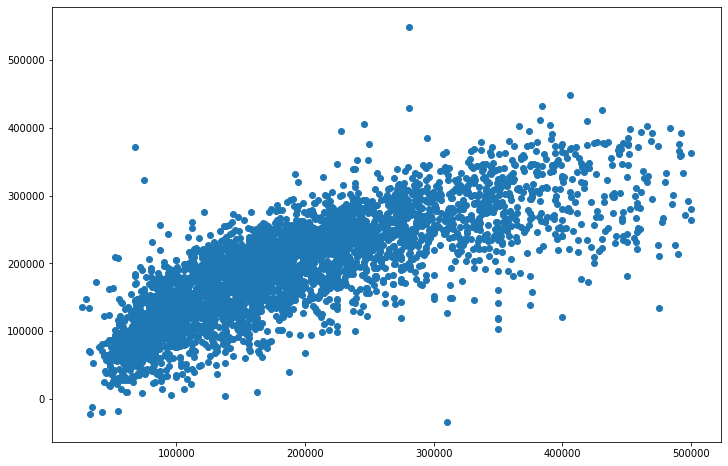

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test,y_pred)
plt.show()

In [28]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [29]:
df_pred_actual_sample.head()

,index,predicted,actual
0,12241,93004.167496,86200.0
1,16599,162385.442334,90600.0
2,17879,230744.696488,81300.0
3,5516,320353.367690,357200.0
4,7389,142891.622320,106600.0


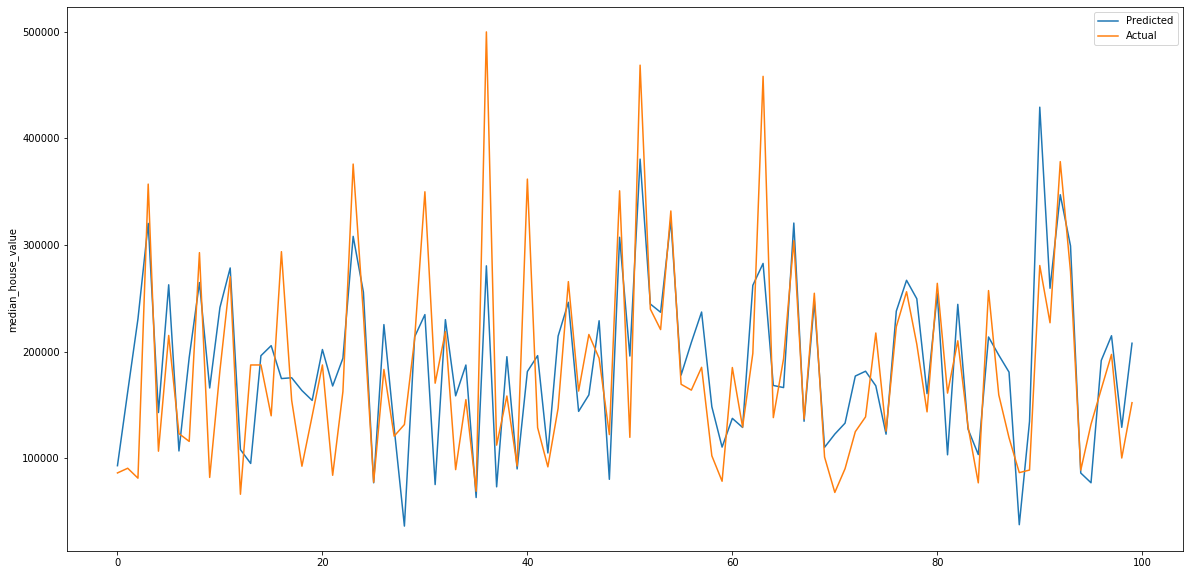

In [30]:
# Actual vs predicted values using line chart
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()